## Практика по Deep Learning на примере полносвязной нейронной сети. Dense Neural Network. MNIST.

In [1]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

#### 1. Import Data 

In [3]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data(path = 'mnist.npz')

In [4]:
type(train_X)

numpy.ndarray

In [5]:
train_X.shape

(60000, 28, 28)

In [6]:
train_y.shape #одномерный массив

(60000,)

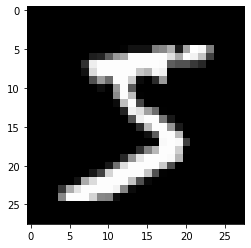

In [7]:
plt.imshow(train_X[0], cmap='gray')

In [8]:
train_y[0] # проверяем, что первому элементу в фичах соответвует верный элемент в лейблах

5

#### 2. Preprocessing

In [9]:
# инвертируем цвета, чтобы в дальнейшем можно было использовать собственные изображения на бумаге
train_X = -(train_X - 256)
test_X = -(test_X - 256)

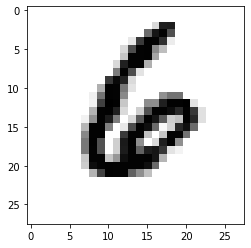

In [10]:
plt.imshow(train_X[13], cmap='gray')

In [11]:
# переводим данные в одномерный массив
train_X_flat = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2]) 
test_X_flat = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2])

In [12]:
# переводим числа в массиве в вещественные 
train_X_flat = train_X_flat.astype('float32')
test_X_flat = test_X_flat.astype('float32')

In [13]:
# нормализуем числовые значения в массиве
train_X_flat /= 255
test_X_flat /= 255

In [14]:
train_X_flat[0]

array([1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 ,
       1.0039216 , 1.0039216 , 1.0039216 , 1.0039216 , 1.00392

In [15]:
# применяем one-hot encoding
train_y_cat = np_utils.to_categorical(train_y, 10)
test_y_cat = np_utils.to_categorical(test_y, 10)

In [16]:
train_y_cat[0] # теперь каждый элемент - это вектор, который указывает к какому значению ближе

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### 3. Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()

In [19]:
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### 4. Model training. 

In [22]:
model.fit(train_X_flat, train_y_cat, epochs=10, batch_size=128, verbose=1, validation_data=[test_X_flat, test_y_cat])

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.4958 - accuracy: 0.8517 - val_loss: 0.2911 - val_accuracy: 0.9108
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2540 - accuracy: 0.9207 - val_loss: 0.2261 - val_accuracy: 0.9302
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1879 - accuracy: 0.9417 - val_loss: 0.1867 - val_accuracy: 0.9409
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1601 - accuracy: 0.9504 - val_loss: 0.1479 - val_accuracy: 0.9534
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1352 - accuracy: 0.9572 - val_loss: 0.1263 - val_accuracy: 0.9627
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1213 - accuracy: 0.9614 - val_loss: 0.1532 - val_accuracy: 0.9510
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1114 - accuracy: 0.9640 - val_loss: 0.1275 - val_accuracy: 0.9596

#### 5. Model testing.

In [23]:
model.evaluate(test_X_flat, test_y_cat, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.1035 - accuracy: 0.9678


[0.1035463958978653, 0.9678000211715698]

#### 6. Custom image.

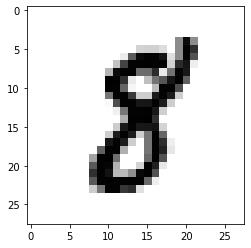

In [24]:
plt.imshow(train_X[41], cmap='gray')

In [25]:
model.predict(train_X[41].reshape(1, 784))

1/1 [==============================] - 0s 141ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [26]:
import numpy as np

In [27]:
np.argmax(model.predict(train_X[41].reshape(1, 784)))

1/1 [==============================] - 0s 20ms/step


8

In [28]:
# а теперь импортируем собственное изображение
from PIL import Image

In [147]:
img = Image.open(r"C:\Users\teply\Documents\Studying\photo_2022-11-22_17-52-50.jpg")

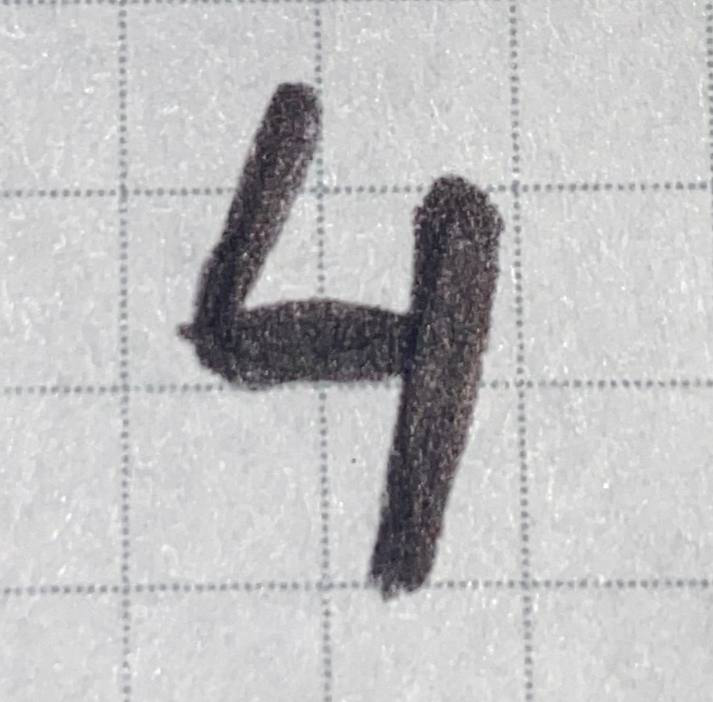

In [148]:
img

In [149]:
image_array = np.array(img)
image_array

array([[[199, 200, 205],
        [193, 194, 199],
        [180, 181, 186],
        ...,
        [198, 200, 199],
        [204, 206, 205],
        [199, 201, 200]],

       [[194, 195, 200],
        [189, 190, 195],
        [179, 180, 185],
        ...,
        [190, 192, 191],
        [191, 193, 192],
        [202, 204, 203]],

       [[194, 195, 200],
        [189, 190, 195],
        [180, 181, 186],
        ...,
        [186, 188, 187],
        [189, 191, 190],
        [200, 202, 201]],

       ...,

       [[219, 219, 219],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [206, 206, 206],
        [207, 207, 207],
        [212, 212, 212]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [207, 207, 207],
        [208, 208, 208],
        [212, 212, 212]],

       [[219, 219, 219],
        [220, 220, 220],
        [221, 221, 221],
        ...,
        [207, 207, 207],
        [208, 208, 208],
        [212, 212, 212]]

In [150]:
image_array.shape

(702, 713, 3)

In [151]:
# размер картинки не подходит для нашей сети
# поэтому используем кастомную функцию для перевода в нужный размер

def resize_image(name):
    img = Image.open(name)
    width, height = img.size # get original dimensions
    square_side = min(width, height) # get minimal dimensions to be square side
    
    img = img.crop((np.ceil((width - square_side)/2),
                    np.ceil((height - square_side)/2),
                    np.ceil((width + square_side)/2),
                    np.ceil((height + square_side)/2))).convert('L') # leave only black-white channel
    img.thumbnail((28, 28))
    np_array = np.array(img)/255
    np_array = np_array.reshape(1, np_array.shape[0] * np_array.shape[1])
    
    return np_array

In [152]:
X = resize_image(r"C:\Users\teply\Documents\Studying\photo_2022-11-22_17-52-50.jpg")

In [153]:
X.shape

(1, 784)

In [154]:
Y = np.argmax(model.predict(X))
print('я умная модель и это цифра', Y)

1/1 [==============================] - 0s 41ms/step
я умная модель и это цифра 4
